In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, ElasticNet, SGDRegressor
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BTP_Phase1/AirQuality.csv", sep=";", decimal=",")

In [ ]:
df.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [ ]:
df.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1     92.0        1559.0        972.0  13.3  47.7  0.7255  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888

In [ ]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
df.tail()

Date Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
9466  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9467  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9468  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9469  NaN  NaN     NaN          NaN       NaN       NaN            NaN   
9470  NaN  NaN     NaN          NaN       NaN       NaN            NaN   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T  RH  AH  
9466      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9467      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9468      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9469      NaN           NaN      NaN           NaN          NaN NaN NaN NaN  
9470      NaN           NaN      NaN           NaN          NaN NaN NaN NaN

In [ ]:
df.dropna(inplace=True)
df.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [ ]:
#first labelling -200 value as null value
df.replace(to_replace=-200,value=np.nan,inplace=True)

In [ ]:
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [ ]:
df.drop(columns=['NMHC(GT)'],inplace=True)
df.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [ ]:
# getting the datatypes of all the columns having null values
# first storing all the column names in a list having null values
col = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']
df = df[col]
df[col].dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [ ]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1  10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2  10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3  10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4  10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

In [ ]:
col = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']

In [ ]:
# Since the data is real valued, we should replace all the null values with mean of each column
for i in col:
    df[i] = df[i].fillna(df[i].mean())

df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1  10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2  10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3  10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4  10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

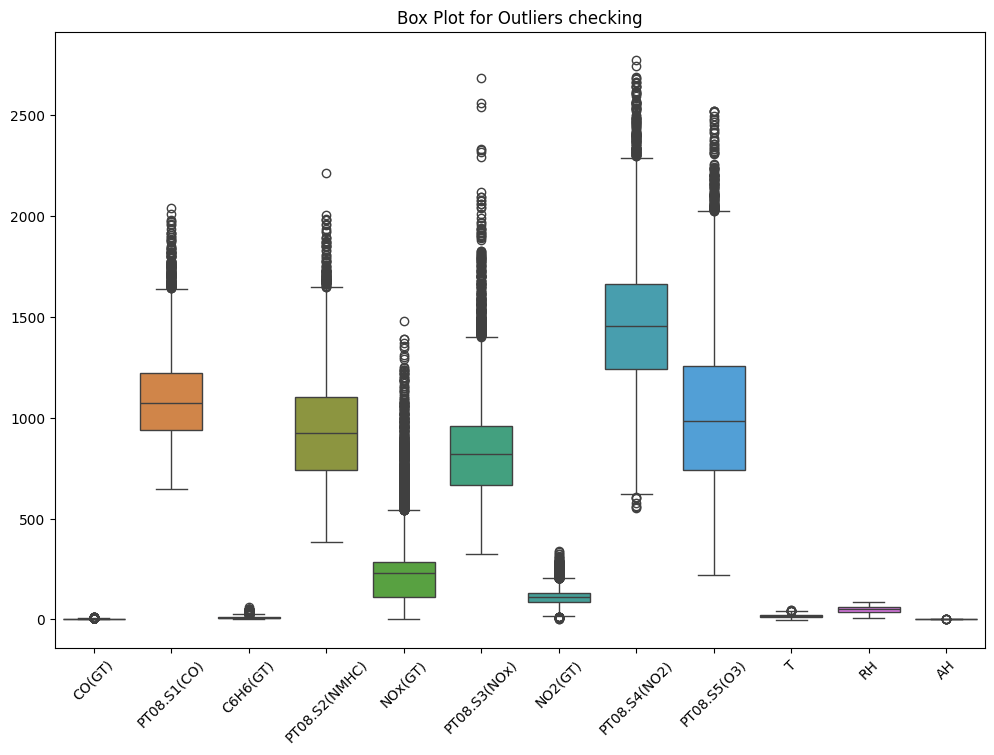

In [ ]:
# Plot box plots for summary statistics of numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot for Outliers checking')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert 'Date' and 'Time' columns to a single DateTime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
data = df.drop(columns=['Date', 'Time'])  # Drop original Date and Time columns

In [ ]:
data.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH            DateTime  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578 2004-03-10 18:00:00  
1     92.0        1559.0        972.0  13.3  47.7  0.7255 2004-03-10 19:00:00  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502 2004-03-10 20:00:00  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867 2004-03-10 21:00:00  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888 2004-03-10 22:00:00

In [ ]:
data.tail()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
9352     3.1       1314.0      13.5         1101.0    472.0         539.0   
9353     2.4       1163.0      11.4         1027.0    353.0         604.0   
9354     2.4       1142.0      12.4         1063.0    293.0         603.0   
9355     2.1       1003.0       9.5          961.0    235.0         702.0   
9356     2.2       1071.0      11.9         1047.0    265.0         654.0   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
9352    190.0        1374.0       1729.0  21.9  29.3  0.7568   
9353    179.0        1264.0       1269.0  24.3  23.7  0.7119   
9354    175.0        1241.0       1092.0  26.9  18.3  0.6406   
9355    156.0        1041.0        770.0  28.3  13.5  0.5139   
9356    168.0        1129.0        816.0  28.5  13.1  0.5028   

                DateTime  
9352 2005-04-04 10:00:00  
9353 2005-04-04 11:00:00  
9354 2005-04-04 12:00:00  
9355 2005-04-04 13:00:00  
9356 2005-04-04 14:00:00

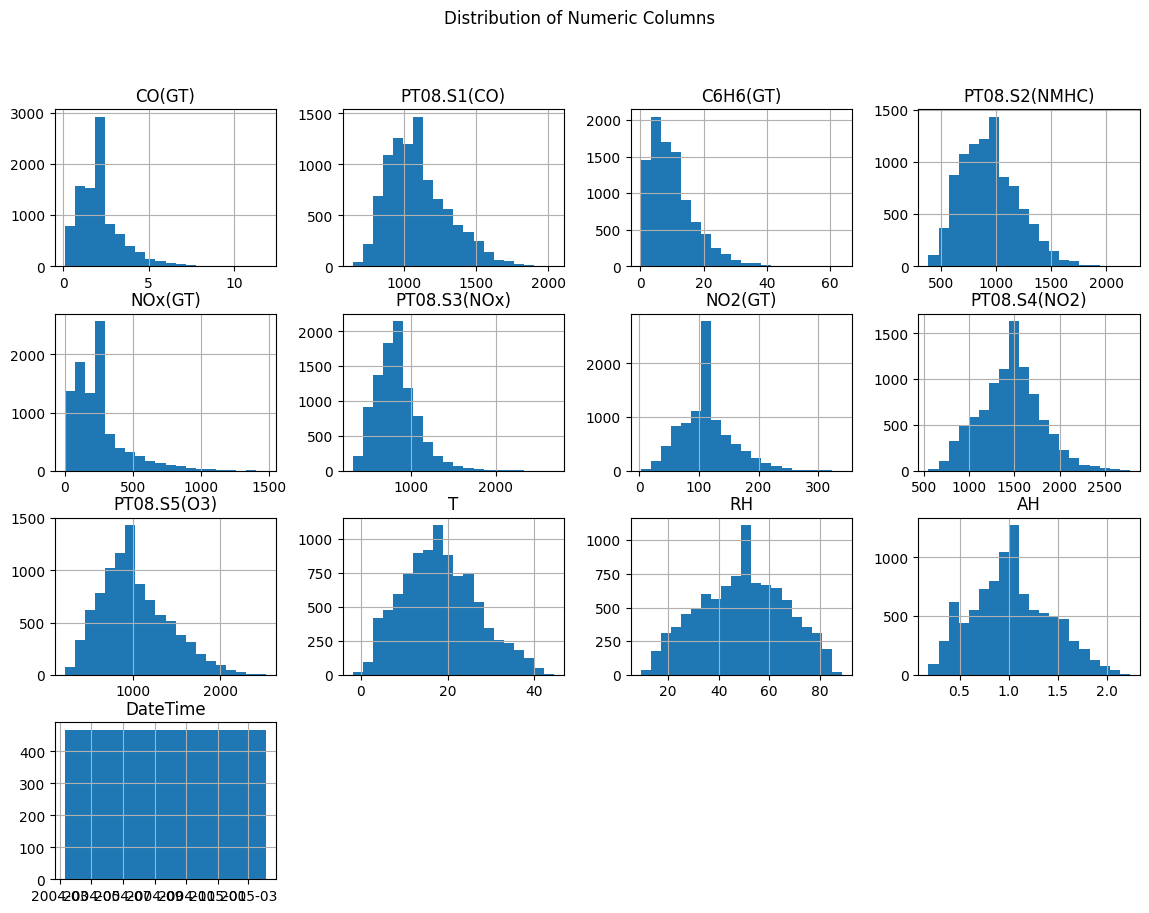

In [ ]:
# Plot histograms for each numeric column
data.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribution of Numeric Columns")
plt.show()


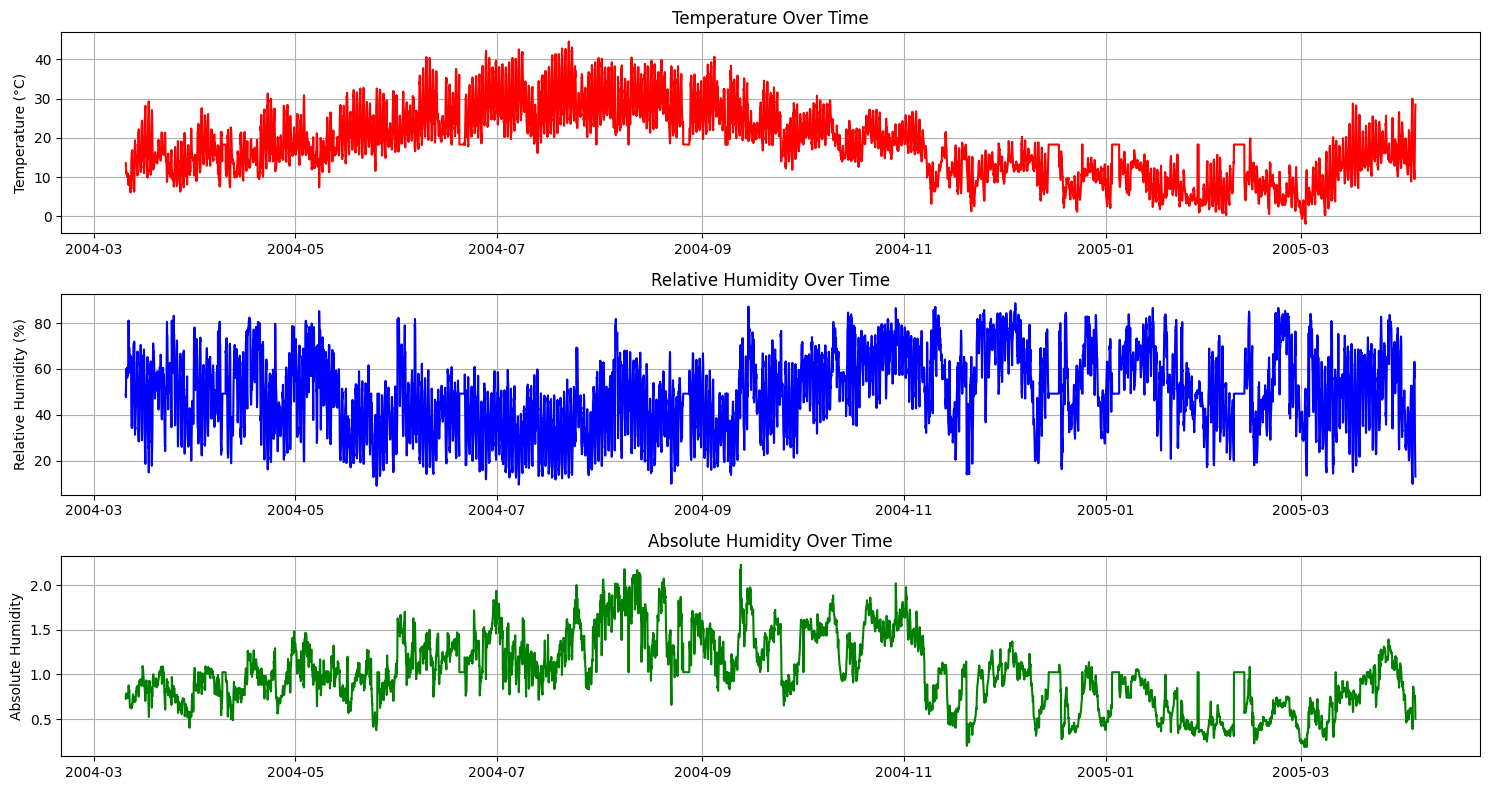

In [ ]:
# Plot time series for temperature, humidity, and air quality metrics
plt.figure(figsize=(15, 8))

# Temperature
plt.subplot(3, 1, 1)
plt.plot(data['DateTime'], data['T'], label='Temperature (T)', color='red')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.grid()

# Relative Humidity
plt.subplot(3, 1, 2)
plt.plot(data['DateTime'], data['RH'], label='Relative Humidity (RH)', color='blue')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over Time')
plt.grid()

# Absolute Humidity
plt.subplot(3, 1, 3)
plt.plot(data['DateTime'], data['AH'], label='Absolute Humidity (AH)', color='green')
plt.ylabel('Absolute Humidity')
plt.title('Absolute Humidity Over Time')
plt.grid()

plt.tight_layout()
plt.show()


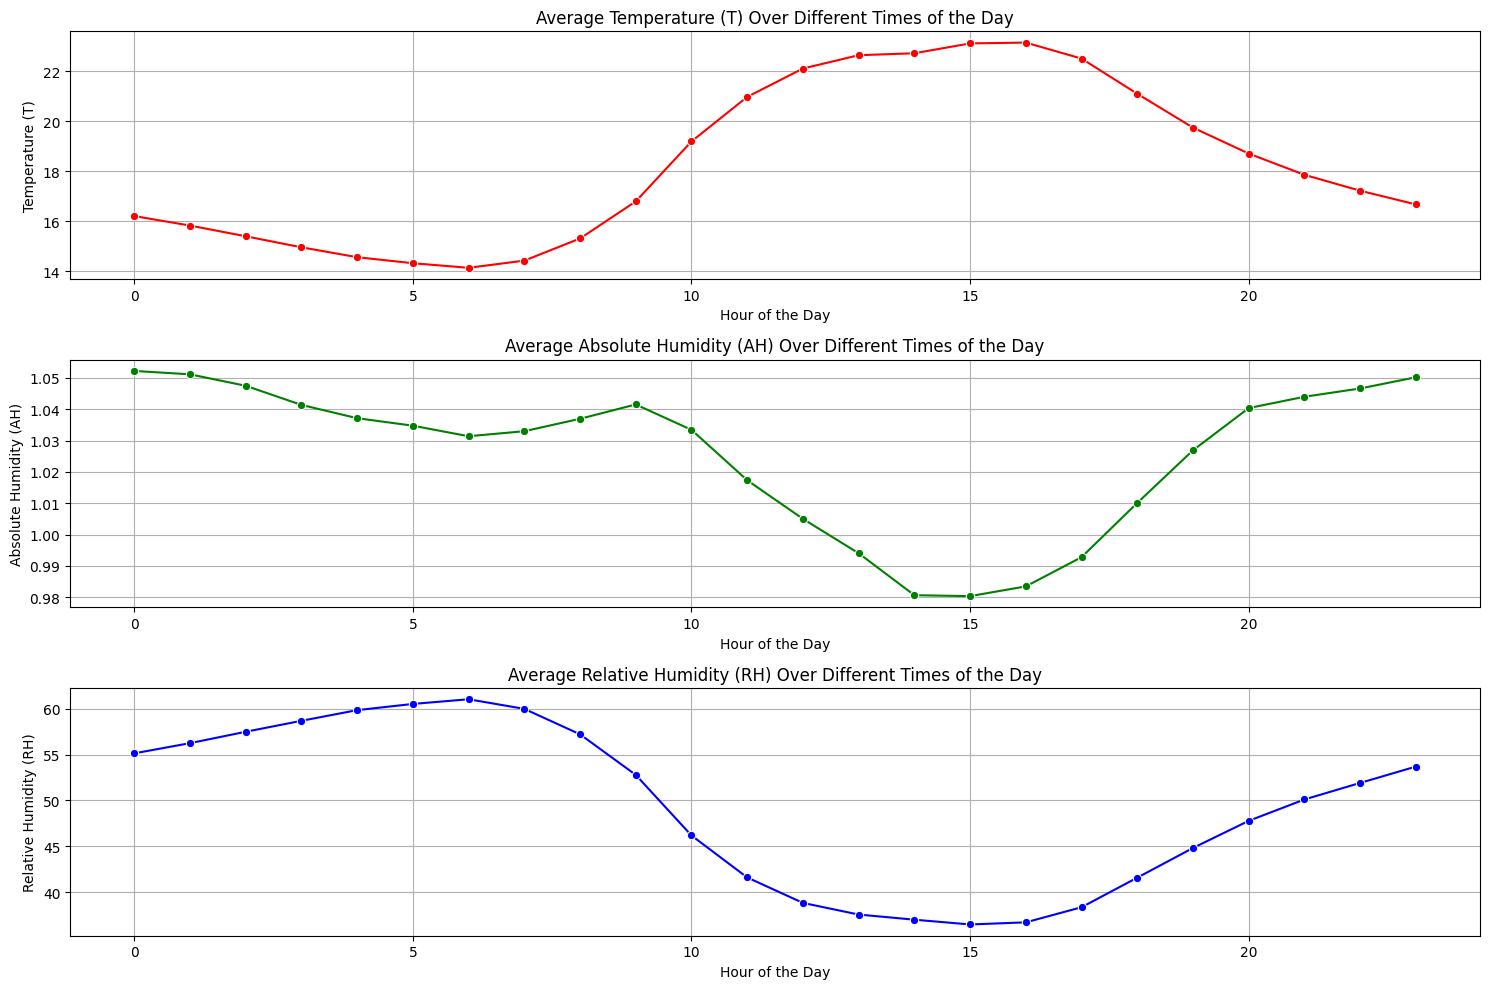

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from the DateTime column
data['Hour'] = data['DateTime'].dt.hour

# Group the data by Hour and calculate the mean for each hour (for visualization purposes)
hourly_data = data.groupby('Hour')[['T', 'AH', 'RH']].mean()

# Plot how T, AH, and RH change over the hours of the day
plt.figure(figsize=(15, 10))

# Temperature (T)
plt.subplot(3, 1, 1)
sns.lineplot(x=hourly_data.index, y=hourly_data['T'], marker='o', color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (T)')
plt.title('Average Temperature (T) Over Different Times of the Day')
plt.grid(True)

# Absolute Humidity (AH)
plt.subplot(3, 1, 2)
sns.lineplot(x=hourly_data.index, y=hourly_data['AH'], marker='o', color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Absolute Humidity (AH)')
plt.title('Average Absolute Humidity (AH) Over Different Times of the Day')
plt.grid(True)

# Relative Humidity (RH)
plt.subplot(3, 1, 3)
sns.lineplot(x=hourly_data.index, y=hourly_data['RH'], marker='o', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Relative Humidity (RH)')
plt.title('Average Relative Humidity (RH) Over Different Times of the Day')
plt.grid(True)

plt.tight_layout()
plt.show()


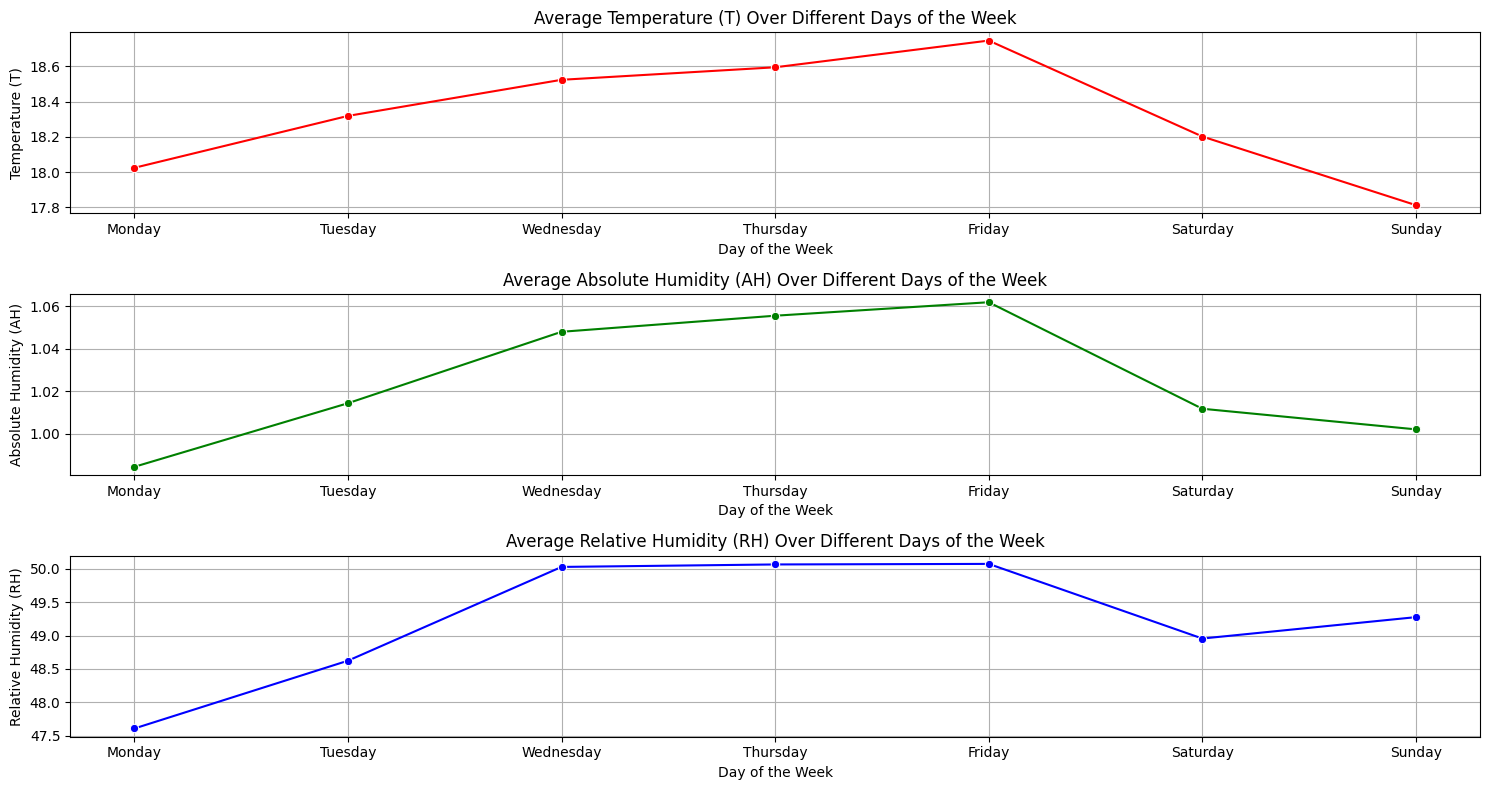

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the day of the week from the DateTime column (0 = Monday, 6 = Sunday)
data['DayOfWeek'] = data['DateTime'].dt.dayofweek

# Group the data by Day of Week and calculate the mean for each day (for visualization purposes)
weekly_data = data.groupby('DayOfWeek')[['T', 'AH', 'RH']].mean()

# Map day numbers to day names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_data['DayName'] = weekly_data.index.map(lambda x: day_names[x])

# Plot how T, AH, and RH change over the days of the week
plt.figure(figsize=(15, 8))

# Temperature (T)
plt.subplot(3, 1, 1)
sns.lineplot(x=weekly_data['DayName'], y=weekly_data['T'], marker='o', color='red')
plt.xlabel('Day of the Week')
plt.ylabel('Temperature (T)')
plt.title('Average Temperature (T) Over Different Days of the Week')
plt.grid(True)

# Absolute Humidity (AH)
plt.subplot(3, 1, 2)
sns.lineplot(x=weekly_data['DayName'], y=weekly_data['AH'], marker='o', color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Absolute Humidity (AH)')
plt.title('Average Absolute Humidity (AH) Over Different Days of the Week')
plt.grid(True)

# Relative Humidity (RH)
plt.subplot(3, 1, 3)
sns.lineplot(x=weekly_data['DayName'], y=weekly_data['RH'], marker='o', color='blue')
plt.xlabel('Day of the Week')
plt.ylabel('Relative Humidity (RH)')
plt.title('Average Relative Humidity (RH) Over Different Days of the Week')
plt.grid(True)

plt.tight_layout()
plt.show()


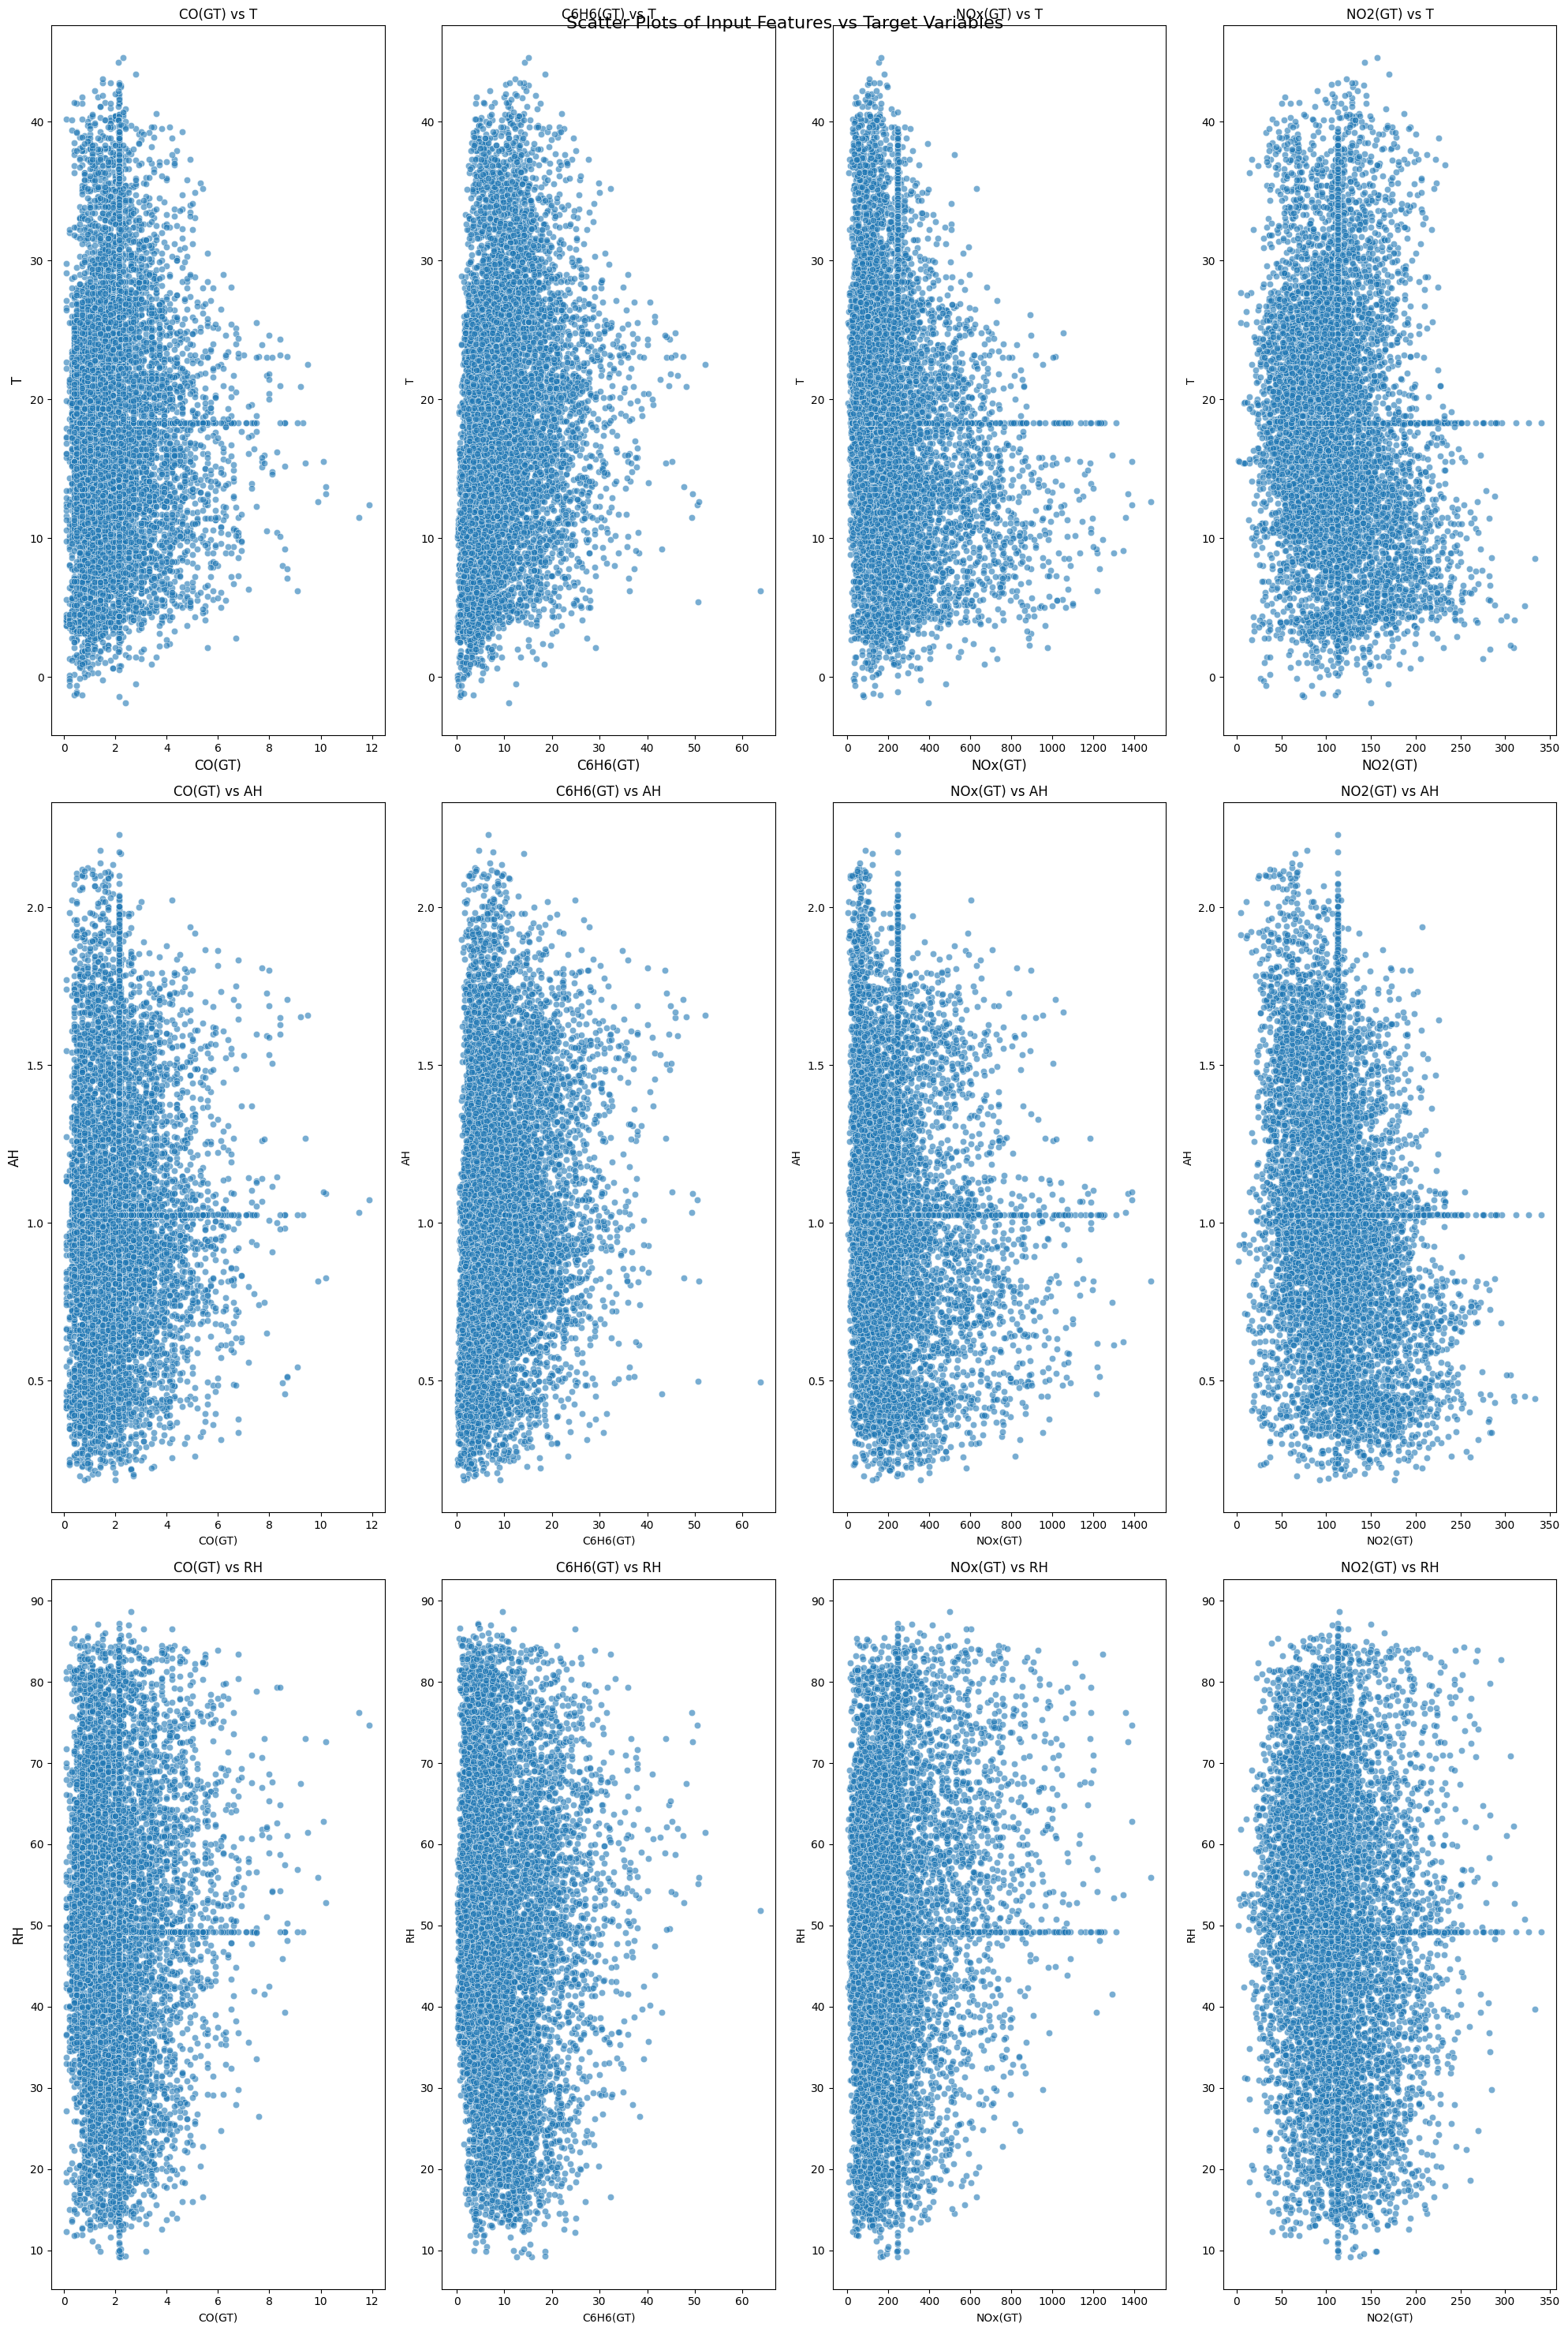

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define input features and target variables
input_features = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
target_variables = ['T', 'AH', 'RH']

# Set up the figure size
plt.figure(figsize=(20, 30))

# Generate scatter plots for each feature vs each target
plot_number = 1
for target in target_variables:
    for feature in input_features:
        plt.subplot(len(target_variables), len(input_features), plot_number)
        sns.scatterplot(x=data[feature], y=data[target], alpha=0.6)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f"{feature} vs {target}")
        plot_number += 1


plt.subplots_adjust(top=0.95)  # Adjust the space for the suptitle

# Add row and column labels
for i, target in enumerate(target_variables):
    plt.subplot(len(target_variables), len(input_features), i * len(input_features) + 1)
    plt.ylabel(target, fontsize=12)

for j, feature in enumerate(input_features):
    plt.subplot(len(target_variables), len(input_features), j + 1)
    plt.xlabel(feature, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1

In [ ]:
# if the values fall behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,
#then it is been defined as outlier
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

CO(GT)           454
PT08.S1(CO)      145
C6H6(GT)         286
PT08.S2(NMHC)     91
NOx(GT)          778
PT08.S3(NOx)     278
NO2(GT)          380
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
dtype: int64

In [ ]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
mask

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0      False        False     False          False    False         False   
1      False        False     False          False    False         False   
2      False        False     False          False    False         False   
3      False        False     False          False    False         False   
4      False        False     False          False    False         False   
...      ...          ...       ...            ...      ...           ...   
9352   False        False     False          False    False         False   
9353   False        False     False          False    False         False   
9354   False        False     False          False    False         False   
9355   False        False     False          False    False         False   
9356   False        False     False          False    False         False   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T     RH     AH  
0       False         False        False  False  False  False  
1       False         False        False  False  False  False  
2       False         False        False  False  False  False  
3       False         False        False  False  False  False  
4       False         False        False  False  False  False  
...       ...           ...          ...    ...    ...    ...  
9352    False         False        False  False  False  False  
9353    False         False        False  False  False  False  
9354    False         False        False  False  False  False  
9355    False         False        False  False  False  False  
9356    False         False        False  False  False  False  

[9357 rows x 12 columns]

In [ ]:
# now replacing all the outliers using the median of that particular column
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

In [ ]:
# outliers are now being handled and are replaced with that column's median value
((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

CO(GT)           454
PT08.S1(CO)      145
C6H6(GT)         286
PT08.S2(NMHC)     91
NOx(GT)          778
PT08.S3(NOx)     278
NO2(GT)          380
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
dtype: int64

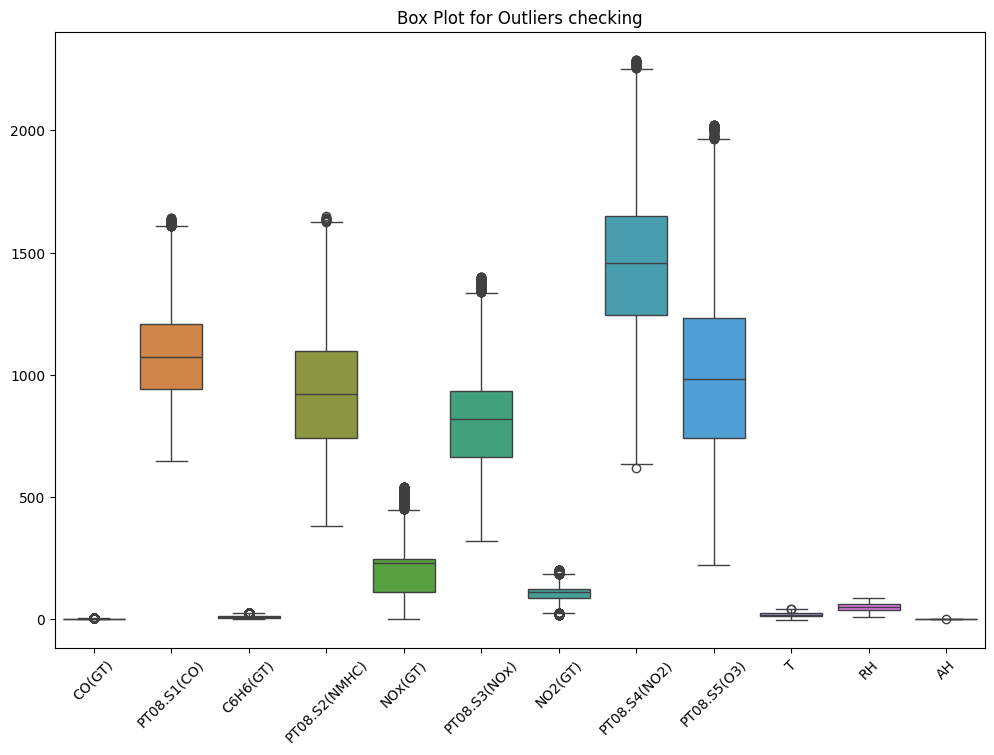

In [ ]:
# Plot box plots for summary statistics of numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot for Outliers checking')
plt.xticks(rotation=45)
plt.show()

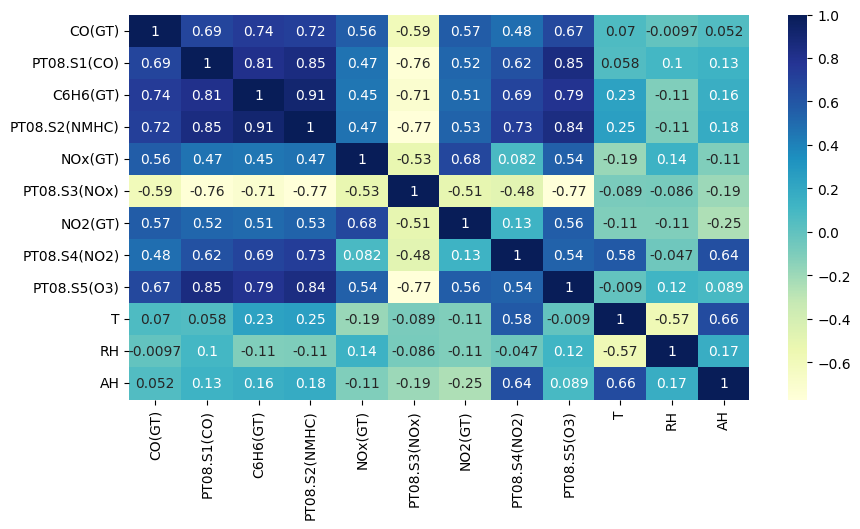

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      1.968721  1089.326487     9.334917     930.984839   204.274420   
std       0.966963   196.073991     5.973808     248.276069   112.523540   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.200000   941.000000     4.600000     743.000000   112.000000   
50%       2.152750  1075.000000     8.600000     923.000000   229.000000   
75%       2.300000  1208.000000    12.700000    1096.000000   246.896735   
max       4.700000  1640.000000    27.100000    1648.000000   542.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
mean     811.638416   108.748371   1443.756066  1006.158667    18.291261   
std      207.612210    36.417725    318.094987   365.169196     8.619390   
min      322.000000    16.000000    621.000000   221.000000    -1.900000   
25%      666.000000    86.000000   1243.000000   742.000000    12.000000   
50%      818.000000   113.091251   1456.264598   983.000000    18.300000   
75%      934.000000   126.000000   1648.000000  1231.000000    24.000000   
max     1401.000000   203.000000   2289.000000  2023.000000    42.200000   

                RH           AH  
count  9357.000000  9357.000000  
mean     49.234201     1.024670  
std      16.974801     0.394603  
min       9.200000     0.184700  
25%      36.600000     0.746100  
50%      49.234201     1.015400  
75%      61.900000     1.295000  
max      88.700000     2.119500

In [ ]:
num_columns_selected1=['CO(GT)','PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)']

In [ ]:
X=df[num_columns_selected1].to_numpy()
Y = df[['T', 'RH', 'AH']].to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [ ]:
# Train-Test Split for multi-output regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

In [ ]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name="Model"):
    predictions = model.predict(X_test)
    r2_scores = []
    mse_scores = []

    for i in range(y_test.shape[1]):
        r2 = r2_score(y_test[:, i], predictions[:, i])
        mse = mean_squared_error(y_test[:, i], predictions[:, i])
        r2_scores.append(r2)
        mse_scores.append(mse)
        print(f"{model_name} R² for target {i+1}: {r2}")
        print(f"{model_name} MSE for target {i+1}: {mse}")

    overall_r2 = r2_score(y_test, predictions)
    print(f"{model_name} Overall R²: {overall_r2}\n")

In [ ]:

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Linear Regression:")
evaluate_model(linear_regression_model, X_test, y_test, "Linear Regression")

Linear Regression:
Linear Regression R² for target 1: 0.5537941256001038
Linear Regression MSE for target 1: 34.547629508728576
Linear Regression R² for target 2: 0.3183391373917688
Linear Regression MSE for target 2: 203.36485038719485
Linear Regression R² for target 3: 0.6809698068664529
Linear Regression MSE for target 3: 0.052669289211749216
Linear Regression Overall R²: 0.5177010232861087



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
print("Random Forest Regressor:")
evaluate_model(rf_model, X_test, y_test, "Random Forest Regressor")

Random Forest Regressor:
Random Forest Regressor R² for target 1: 0.8145667627604036
Random Forest Regressor MSE for target 1: 14.357226442555405
Random Forest Regressor R² for target 2: 0.7068229318742416
Random Forest Regressor MSE for target 2: 87.46565024757425
Random Forest Regressor R² for target 3: 0.8803707809560757
Random Forest Regressor MSE for target 3: 0.019749810743971235
Random Forest Regressor Overall R²: 0.8005868251969067



In [ ]:
# Support Vector Regression
svr_models = [SVR() for _ in range(3)]
predictions = np.zeros(y_test.shape)
for i in range(3):
    svr_models[i].fit(X_train, y_train[:, i])
    predictions[:, i] = svr_models[i].predict(X_test)

In [ ]:
print("Support Vector Regression:")
for i in range(3):
    r2 = r2_score(y_test[:, i], predictions[:, i])
    mse = mean_squared_error(y_test[:, i], predictions[:, i])
    print(f"SVR R² for target {i+1}: {r2}")
    print(f"SVR MSE for target {i+1}: {mse}")
overall_r2_svr = r2_score(y_test, predictions)
print(f"SVR Overall R²: {overall_r2_svr}\n")

Support Vector Regression:
SVR R² for target 1: 0.7195004821419271
SVR MSE for target 1: 21.71776297963493
SVR R² for target 2: 0.5325055280633583
SVR MSE for target 2: 139.47103106149166
SVR R² for target 3: 0.8878418572010323
SVR MSE for target 3: 0.018516396841657828
SVR Overall R²: 0.7132826224687729



In [ ]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
print("Polynomial Regression:")
evaluate_model(poly_model, X_poly_test, y_test, "Polynomial Regression")

Polynomial Regression:
Polynomial Regression R² for target 1: 0.6788789082218013
Polynomial Regression MSE for target 1: 24.862901056853982
Polynomial Regression R² for target 2: 0.5209672451923211
Polynomial Regression MSE for target 2: 142.91333103572708
Polynomial Regression R² for target 3: 0.7665064616912285
Polynomial Regression MSE for target 3: 0.03854788343845367
Polynomial Regression Overall R²: 0.6554508717017834



In [ ]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbors Regression:")
evaluate_model(knn_model, X_test, y_test, "K-Nearest Neighbors Regression")

K-Nearest Neighbors Regression:
K-Nearest Neighbors Regression R² for target 1: 0.8140814766259974
K-Nearest Neighbors Regression MSE for target 1: 14.39479987342907
K-Nearest Neighbors Regression R² for target 2: 0.6537056343739092
K-Nearest Neighbors Regression MSE for target 2: 103.31252051939082
K-Nearest Neighbors Regression R² for target 3: 0.8780623055782748
K-Nearest Neighbors Regression MSE for target 3: 0.020130921246765254
K-Nearest Neighbors Regression Overall R²: 0.7819498055260604



In [ ]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
print("Decision Tree Regressor:")
evaluate_model(dt_model, X_test, y_test, "Decision Tree Regressor")

Decision Tree Regressor:
Decision Tree Regressor R² for target 1: 0.6025242441662138
Decision Tree Regressor MSE for target 1: 30.77468482394032
Decision Tree Regressor R² for target 2: 0.39489986963872525
Decision Tree Regressor MSE for target 2: 180.5239294644915
Decision Tree Regressor R² for target 3: 0.7033880345411533
Decision Tree Regressor MSE for target 3: 0.04896822222051505
Decision Tree Regressor Overall R²: 0.5669373827820307



In [ ]:
# Gradient Boosting Regressor
# Wrap GradientBoostingRegressor with MultiOutputRegressor
gb_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
gb_model.fit(X_train, y_train)
print("Gradient Boosting Regressor:")
evaluate_model(gb_model, X_test, y_test, "Gradient Boosting Regressor")

Gradient Boosting Regressor:
Gradient Boosting Regressor R² for target 1: 0.7262492769199524
Gradient Boosting Regressor MSE for target 1: 21.195235431257768
Gradient Boosting Regressor R² for target 2: 0.5608136705848435
Gradient Boosting Regressor MSE for target 2: 131.02565670540238
Gradient Boosting Regressor R² for target 3: 0.8351615428344054
Gradient Boosting Regressor MSE for target 3: 0.027213488129128136
Gradient Boosting Regressor Overall R²: 0.7074081634464003



In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)
print("XGBoost Regressor:")
evaluate_model(xgb_model, X_test, y_test, "XGBoost Regressor")


XGBoost Regressor:
XGBoost Regressor R² for target 1: 0.8034429385700187
XGBoost Regressor MSE for target 1: 15.218492012773412
XGBoost Regressor R² for target 2: 0.6811587708310591
XGBoost Regressor MSE for target 2: 95.12222635037342
XGBoost Regressor R² for target 3: 0.9132958152816388
XGBoost Regressor MSE for target 3: 0.014314155459538824
XGBoost Regressor Overall R²: 0.7992991748942391



In [ ]:
# AdaBoost Regressor
ada_model = MultiOutputRegressor(AdaBoostRegressor(random_state=0))
ada_model.fit(X_train, y_train)
print("AdaBoost Regressor:")
evaluate_model(ada_model, X_test, y_test, "AdaBoost Regressor")


AdaBoost Regressor:
AdaBoost Regressor R² for target 1: 0.543766782454613
AdaBoost Regressor MSE for target 1: 35.32399969079579
AdaBoost Regressor R² for target 2: 0.28834627034962235
AdaBoost Regressor MSE for target 2: 212.3128408811345
AdaBoost Regressor R² for target 3: 0.6058495779905244
AdaBoost Regressor MSE for target 3: 0.06507102781039922
AdaBoost Regressor Overall R²: 0.4793208769315866



In [ ]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
print("Ridge Regression:")
evaluate_model(ridge_model, X_test, y_test, "Ridge Regression")


Ridge Regression:
Ridge Regression R² for target 1: 0.5537752678251451
Ridge Regression MSE for target 1: 34.54908957785812
Ridge Regression R² for target 2: 0.3183277230366448
Ridge Regression MSE for target 2: 203.36825571490164
Ridge Regression R² for target 3: 0.6809400820420386
Ridge Regression MSE for target 3: 0.05267419653841465
Ridge Regression Overall R²: 0.5176810243012762



In [ ]:
bayesian_ridge_model = MultiOutputRegressor(BayesianRidge())
bayesian_ridge_model.fit(X_train, y_train)
print("Bayesian Ridge Regression:")
evaluate_model(bayesian_ridge_model, X_test, y_test, "Bayesian Ridge Regression")


Bayesian Ridge Regression:
Bayesian Ridge Regression R² for target 1: 0.5537196387938089
Bayesian Ridge Regression MSE for target 1: 34.55339667302381
Bayesian Ridge Regression R² for target 2: 0.31828996475252525
Bayesian Ridge Regression MSE for target 2: 203.37952041883588
Bayesian Ridge Regression R² for target 3: 0.6809196829624338
Bayesian Ridge Regression MSE for target 3: 0.05267756426048765
Bayesian Ridge Regression Overall R²: 0.5176430955029226

